## Reading the data from csv file

In [1]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
# Loading data from csv file
import pandas as pd
data_path = '/gdrive/MyDrive/Colab Notebooks/lsh_assignment_data.csv'

df = pd.read_csv(data_path)
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,NaN,cars pull down us retail figures us retail sal...
2221,NaN,kilroy unveils immigration policy ex-chatshow ...
2222,NaN,rem announce new glasgow concert us band rem h...
2223,NaN,how political squabbles snowball it s become c...


In [3]:
# Data Overiview
df['category'].value_counts()

sport            509
business         508
politics         415
tech             399
entertainment    384
Name: category, dtype: int64

### Creating Train and Test Datasets

Note that the labels for test data will not be present in the dataset and hence they are mentioned as NaN.

In [4]:
# The last 10 rows in the csv file are query points, so loading them into test data.
# And loading the reamining points to train_data for which labels are given.

train_data = df.iloc[:-10,:]
test_data = df.iloc[-10:,:]

In [5]:
# For train_data here the labels are in the column named "category".
train_data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2210,politics,teens know little of politics teenagers ques...
2211,entertainment,lopez misses uk charity premiere jennifer lope...
2212,business,christmas shoppers flock to tills shops all ov...
2213,tech,progress on new internet domains by early 2005...


In [6]:
test_data

,category,text
2215,NaN,junk e-mails on relentless rise spam traffic i...
2216,NaN,top stars join us tsunami tv show brad pitt r...
2217,NaN,rings of steel combat net attacks gambling is ...
2218,NaN,davies favours gloucester future wales hooker ...
2219,NaN,beijingers fume over parking fees choking traf...
2220,NaN,cars pull down us retail figures us retail sal...
2221,NaN,kilroy unveils immigration policy ex-chatshow ...
2222,NaN,rem announce new glasgow concert us band rem h...
2223,NaN,how political squabbles snowball it s become c...
2224,NaN,souness delight at euro progress boss graeme s...


## Custom Implementation

### Instructions:

  1. Read in the train_data.
  2. Vectorize train_data using sklearns built in tfidf vectorizer.
  3. Ignore unigrams and make use of both **bigrams & trigrams** and also limit the **max features** to **4000** and **minimum document frequency** to **10**.
  4. After the tfidf vectors are generated as mentioned above, next task is to generate random hyperplanes.
  5. Generate **random hyperplanes**. And generate the hyperplanes using a random normal distribution with **mean zero and variance 1**. 5 hyperplane in this case.
  6. We have set the **numpy random seed to zero**. And then you can make use of **np.random.normal** to generate the vectors for hyperplanes.
  7. Compute the hash function and also the corresponding hash table for it.
  8. Once the hash table is generated now take in each of the query points from the test data.
  9. Vectorize those query points using the same tfidf vectorizer as mentioned above.
  10. Now use the hash function on this query point and fetch all the similar data points from the hashtable.
  11. Use cosine similarity to compute **11-Nearest Neighbours** from the list of data points obtained in the above step.
  12. Take a majority vote among the 11-Nearest Neighbours and predict the class label for the query point in the test data.
  13. **In case of a tie** in the obtained labels from nearest neighbours, you can pick a label after sorting all the labels **alphabetically**(A-Z), i.e. for example labels starting with A would get more preference than labels starting with Z.
  14. Repeat steps 9 to 13 for all the points in the test data and then finally return a list with all the predicted labels.
  15. Note that there are a total of 10 data points in the test data so the final list you return should be of length 10.
  16. Also note that the cosine similarity function should be written from scratch, you should not directly make use of existing libraries.


In [7]:
# Vectorizing train_data using sklearns built in tfidf vectorizer.

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (2,3), max_features = 4000, min_df = 10)
train_tfidf = tf.fit_transform(train_data['text'])    # vectorizing train data
print("Type : ", type(train_tfidf))
print("Shape : ", train_tfidf.get_shape())
print(pd.DataFrame(train_tfidf.toarray(),columns = tf.get_feature_names()))

test_tfidf = tf.transform(test_data['text'])      # vectorizing train data


Type :  <class 'scipy.sparse.csr.csr_matrix'>
Shape :  (2215, 4000)
      000 and  000 in  000 jobs  ...  you want  you will  young people
0         0.0     0.0       0.0  ...       0.0       0.0           0.0
1         0.0     0.0       0.0  ...       0.0       0.0           0.0
2         0.0     0.0       0.0  ...       0.0       0.0           0.0
3         0.0     0.0       0.0  ...       0.0       0.0           0.0
4         0.0     0.0       0.0  ...       0.0       0.0           0.0
...       ...     ...       ...  ...       ...       ...           ...
2210      0.0     0.0       0.0  ...       0.0       0.0           0.0
2211      0.0     0.0       0.0  ...       0.0       0.0           0.0
2212      0.0     0.0       0.0  ...       0.0       0.0           0.0
2213      0.0     0.0       0.0  ...       0.0       0.0           0.0
2214      0.0     0.0       0.0  ...       0.0       0.0           0.0

[2215 rows x 4000 columns]


In [8]:
import numpy as np

def generate_hyperplane(train_tfidf):
  #hyperplanes = []
  np.random.seed(0)
  dim = train_tfidf.shape[1]
  # Generating 5*4000 dimention matrix where each row represent hyperplane having mean as zero and Standard deviation as 1
  hyperplanes = np.random.normal(loc=0, scale=1 , size=(5,dim))     
  #for i in range(5):
    #hyperplanes.append(np.random.normal(loc=0, scale=1 , size=dim))
  return hyperplanes

In [9]:
# Finding out on which side of hyperplane individual point lies and If it lies on positive side we'll store it as +1 and 0 otherwise. 

def generate_hashcode(train_tfidf, hyperplane):
  # Multiplying hyperplane with tfidf vectorized value, point is >0 set it as +1 in bin and if value is negative set 0 in bin
  tfidf_hp_prod = (train_tfidf.dot(hyperplane.T) > 0).astype(int) 
  hash_code = tuple(map(tuple, tfidf_hp_prod)) # Coverting above list into tuple as we will to use it as key
  
  return hash_code

In [10]:
# In this block of code we are storing index number of all points having similar hash code as value.
# This indicates all these points belongs to same division of hyperplan and they are neighbour.

def generate_hashTable(hash_code, hash_table):

  for key in hash_table.keys():
    index = 0            
    temp_list = []
    for bit in hash_code:
      if key == bit:
        temp_list.append(index)
      index += 1

      #print(temp_list)

    hash_table[key] = temp_list       # Sotiing list of points having same hash code as value of hash code

  return hash_table
#hash_table[(0,1,1,0,1)]

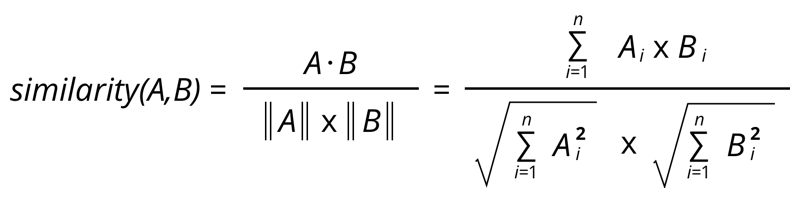




Cosine Distance = 1- Cosine Similarity


In [11]:
def cosine_distance(x, y):
  x = x[0]
  y = y[0]
  numerator = np.sum(x*y)
  #print("Numerator : ",numerator)
  sum_x = sum(x**2)**0.5              # ------------------------> ||A||
  sum_y = sum(y**2)**0.5              # ------------------------> ||B||

  cos_similarity = numerator/(sum_x * sum_y)
  cosine_distance = 1 - cos_similarity
  #print(cos_similarity)
  return cosine_distance

In [12]:
# In this block we are finding 11 neariest neighbour and deciding category of test point based on majority voting.


def find_category(neighbour):
  # Note: We are using cosine distance in case. So smaller the distance value nearer the point is. Therefore I am not sorting it in descending order. 
  # If you're using cosine similarity make sure you order it in descending order before choosing neariest neighbour. In sort_value we have to pass ascending = False to sort it in descending order.
  neighbour = neighbour.sort_values(by=['Cos_Diff'])
  #print("Neighbour : ",neighbour)
  top_11 = neighbour[:11]
  #print("Top 11 : ",top_11['idx'])
  category_list = list(train_data['category'][top_11['idx']])
  #print(cat)
  category = max(category_list, key = category_list.count)          # Finding maximum occurance as category
  
  return category

In [13]:
# Please implement this fucntion and write your code wherever asked. Do NOT change the code snippets provided by us.

import numpy as np

def predictLabels (test_data):
  """
  Given the test_data, return the labels for all the rows in the test data.
  Follow the step by step instructions mentioned above.
  """

  np.random.seed(0)

  ##############################################################
  ####  Write YOUR CODE BELOW  as per the above instructions ###
  ##############################################################

  hyperplane = np.array(generate_hyperplane(train_tfidf))
  hash_code = generate_hashcode(train_tfidf, hyperplane)
  hash_table = dict.fromkeys(hash_code)         # using above generated hashcode tuple a key for dictonary 
  hash_table = generate_hashTable(hash_code, hash_table)
  test_hash = generate_hashcode(test_tfidf, hyperplane)
 
  category = []
  count = 0

  for t_hash in test_hash:
    neighbour = pd.DataFrame()
    temp_list = []
    #temp_dict = dict()
    group = hash_table[t_hash]                # Storing all data point (index) which has same hash code as of query/test data point
    data = test_tfidf[count].toarray()        # Storing tfidf value of test data point sequentially. In other words test_hash contain corresponding hashcode of test_tfidf value
    #print(data)

    for idx in group:
      # Finding tfidf value of all index value corresponding to test hashcode
      y = train_tfidf[idx].toarray()          
      cosine_dif = cosine_distance(data, y)  # Finding distance between test tdidf and tfidf of all train data points corresponding to hashcode
      temp_list.append(cosine_dif)

    neighbour['idx'] = group
    neighbour['Cos_Diff'] = temp_list
    #print("Neighour : ",neighbour)
    category.append(find_category(neighbour))
    count += 1              # Incrementing counter to find next test tfidf vector
    #break
  print(category)
  return category

## Grader Cell

Please execute the following Grader cell to verify the correctness of your above implementation. This cell will print "Success" if your implmentation of the predictLabels() is correct, else, it will print "Failed". Make sure you get a "Success" before you submit the code in the classroom.

In [14]:
###########################################
## GRADER CELL: Do NOT Change this.
# This cell will print "Success" if your implmentation of the predictLabels() is correct and the accuracy obtained is above 80%.
# Else, it will print "Failed"
###########################################
import numpy as np

# Predict the labels using the predictLabels() function
Y_custom = np.array(predictLabels(test_data))

# Reference grader array - DO NOT MODIFY IT
Y_grader = np.array(['tech', 'entertainment', 'tech', 'sport', 'business', 'business', 'politics', 'entertainment', 'politics', 'sport'])

# Calculating accuracy by comparing Y_grader and Y_custom
accuracy = np.sum(Y_grader==Y_custom) * 10

if accuracy >= 80:
  print("******** Success ********","Accuracy Achieved = ", accuracy,'%')
else:
  print("####### Failed #######","Accuracy Achieved = ", accuracy,'%')
  print("\nY_grader = \n\n", Y_grader)
  print("\n","*"*50)
  print("\nY_custom = \n\n", Y_custom)


['tech', 'entertainment', 'tech', 'tech', 'business', 'business', 'politics', 'entertainment', 'politics', 'sport']
******** Success ******** Accuracy Achieved =  90 %
